In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
df = pd.read_csv('data\loan_approval_dataset.csv')


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
C:\Users\VegaNtech\AppData\Local\Temp\ipykernel_27328\2117411261.py:13: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv('data\loan_approval_dataset.csv')


In [43]:
# Diaplay the first 10 rows
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
# checking data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
# Dispay our shape
df.shape

(4269, 13)

In [5]:
# Check the missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
# Checking duplicate value
df.duplicated().sum()

0

In [50]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

EXPLORATORY DATA ANALYSIS

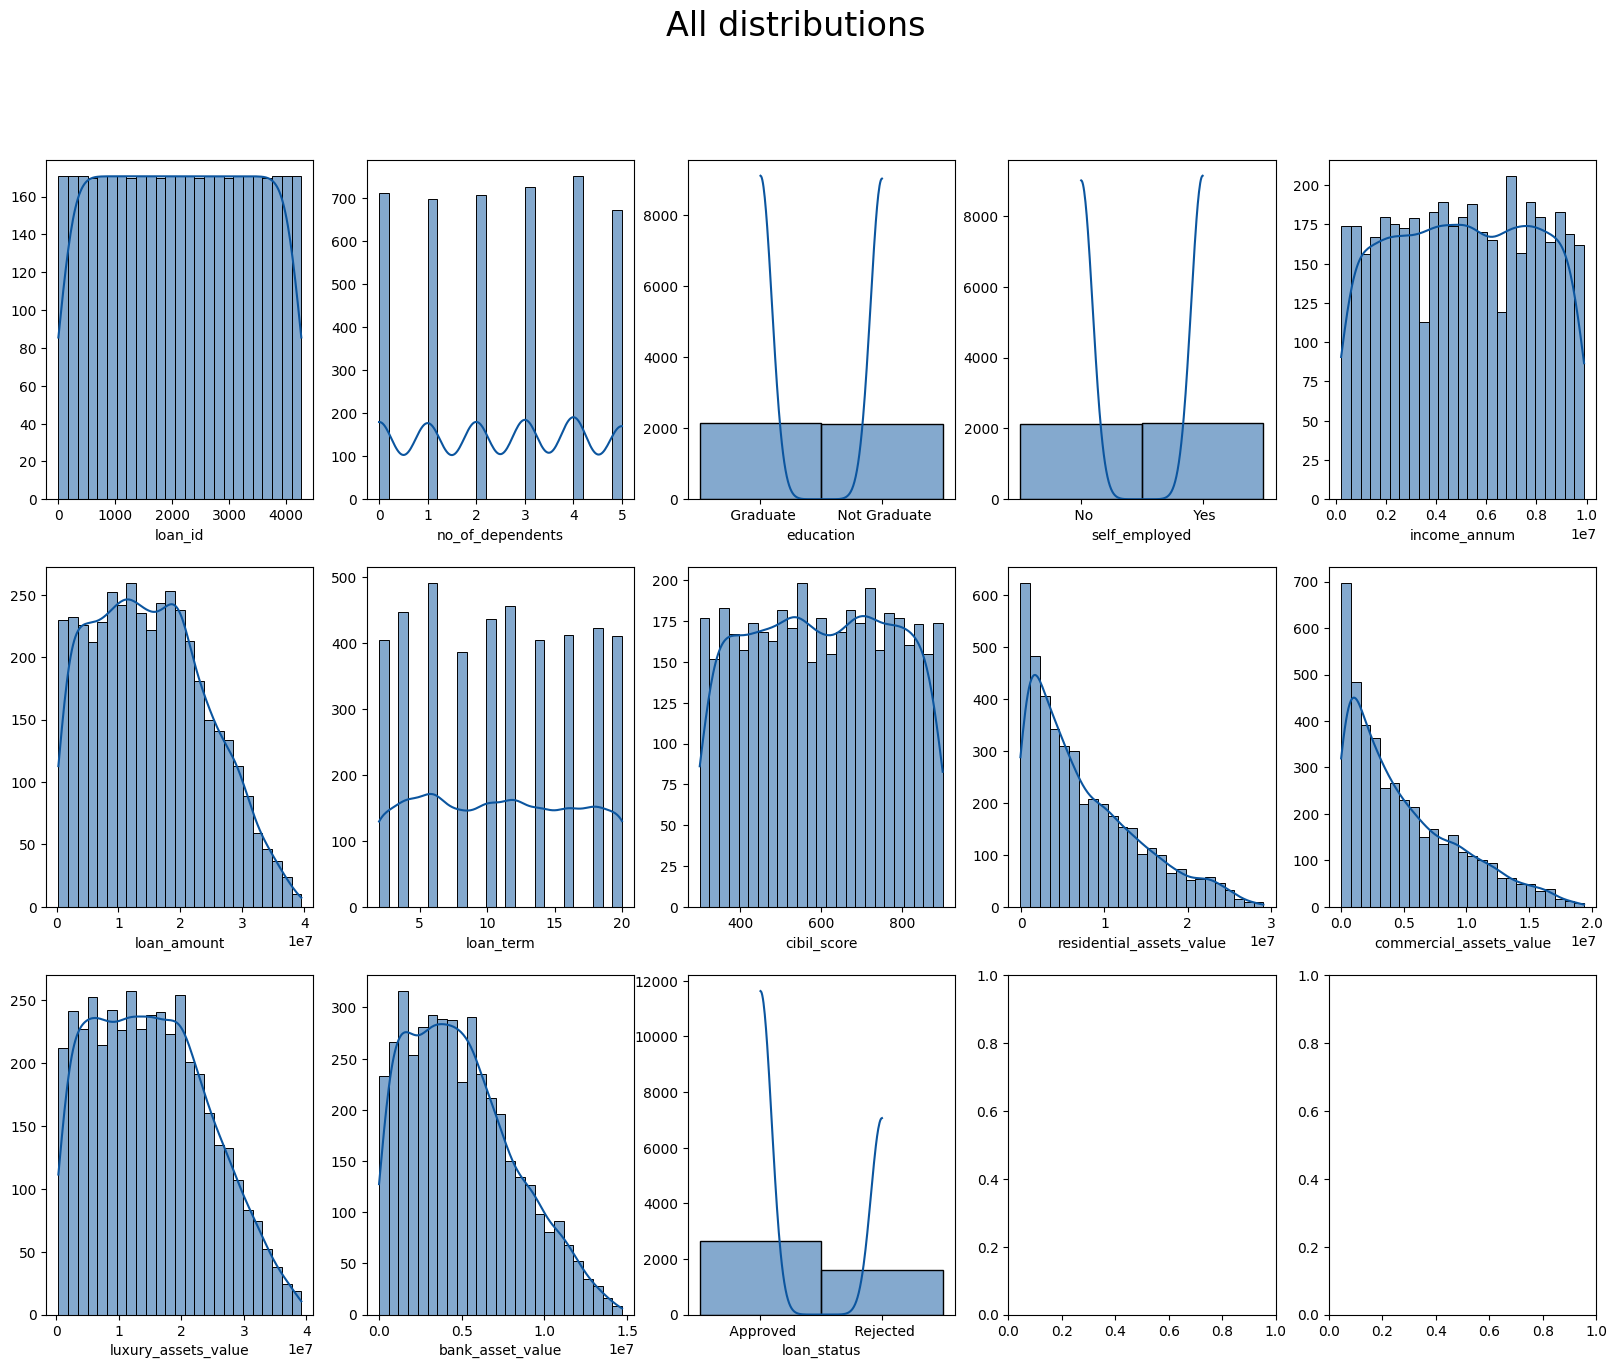

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Blues_r')
fig , axes = plt.subplots(3,5,figsize=(20,15))
axes =axes.flatten()
ax_no=0
for col in df.columns:
    sns.histplot(data=df,x=col,bins =25, kde=True, ax=axes[ax_no])
    axes[ax_no].set_ylabel('')
    ax_no += 1
fig.suptitle('All distributions',fontsize=24)
plt.show()

Text(0.5, 0.98, 'All distributions with the target variable')

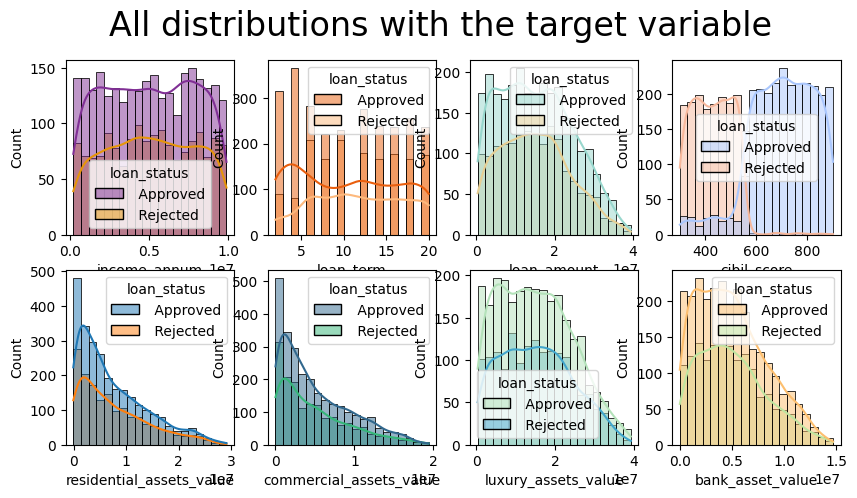

In [10]:
# Distribution with some variables with target variable
fig,axes =plt.subplots(2,4 , figsize=(10,5))
axes = axes.flatten()
sns.histplot(data=df , x='income_annum',bins=20,kde=True,hue='loan_status',ax=axes[0],palette='CMRmap')
sns.histplot(data=df , x='loan_term',bins=20,kde=True,hue='loan_status',ax=axes[1],palette='Oranges_r')
sns.histplot(data=df , x='loan_amount',bins=20,kde=True,hue='loan_status',ax=axes[2],palette='BrBG_r')
sns.histplot(data=df , x='cibil_score',bins=20,kde=True,hue='loan_status',ax=axes[3],palette='coolwarm')
sns.histplot(data=df , x='residential_assets_value',bins=20,kde=True,hue='loan_status',ax=axes[4],palette='tab10')
sns.histplot(data=df , x='commercial_assets_value',bins=20,kde=True,hue='loan_status',ax=axes[5],palette='viridis')
sns.histplot(data=df , x='luxury_assets_value',bins=20,kde=True,hue='loan_status',ax=axes[6],palette='GnBu')
sns.histplot(data=df , x='bank_asset_value',bins=20,kde=True,hue='loan_status',ax=axes[7],palette='Spectral')
fig.suptitle('All distributions with the target variable',fontsize=24)

In [51]:
## Labelling 0 & 1 for education
df['education'] = df['education'].str.strip()
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Verify the count of each unique value
print(df['education'].value_counts())

education
1    2144
0    2125
Name: count, dtype: int64


In [52]:
## Labelling 0 & 1 for Self_employed
df['self_employed'] = df['self_employed'].str.strip()
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
print(df['self_employed'].value_counts())

self_employed
1    2150
0    2119
Name: count, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   int64 
 3   self_employed             4269 non-null   int64 
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(12), object(1)
memory usage: 433.7+ KB


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

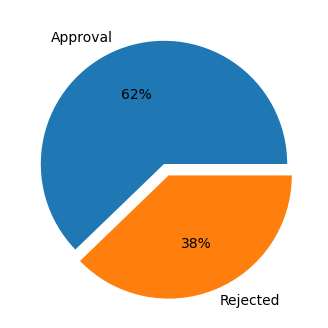

In [53]:
#target variable
loan_status = df['loan_status'].value_counts()
display(loan_status)
#plotting output variable
sns.set_palette('tab10')
plt.figure(figsize=(6,4))
plt.pie(loan_status,labels=['Approval','Rejected'],autopct='%.0f%%',explode=[0,0.1])
plt.show()

In [54]:
X = df.drop(columns=["loan_status","loan_id"])
df['loan_status']= df['loan_status'].str.strip()
y= df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
y.value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

C:\Users\VegaNtech\AppData\Local\Temp\ipykernel_27328\396684300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mi_scores.values, y =mi_scores.index, ax = axes[1], palette = 'rocket')


Text(0.5, 0.98, 'Correlations and Mutual Information')

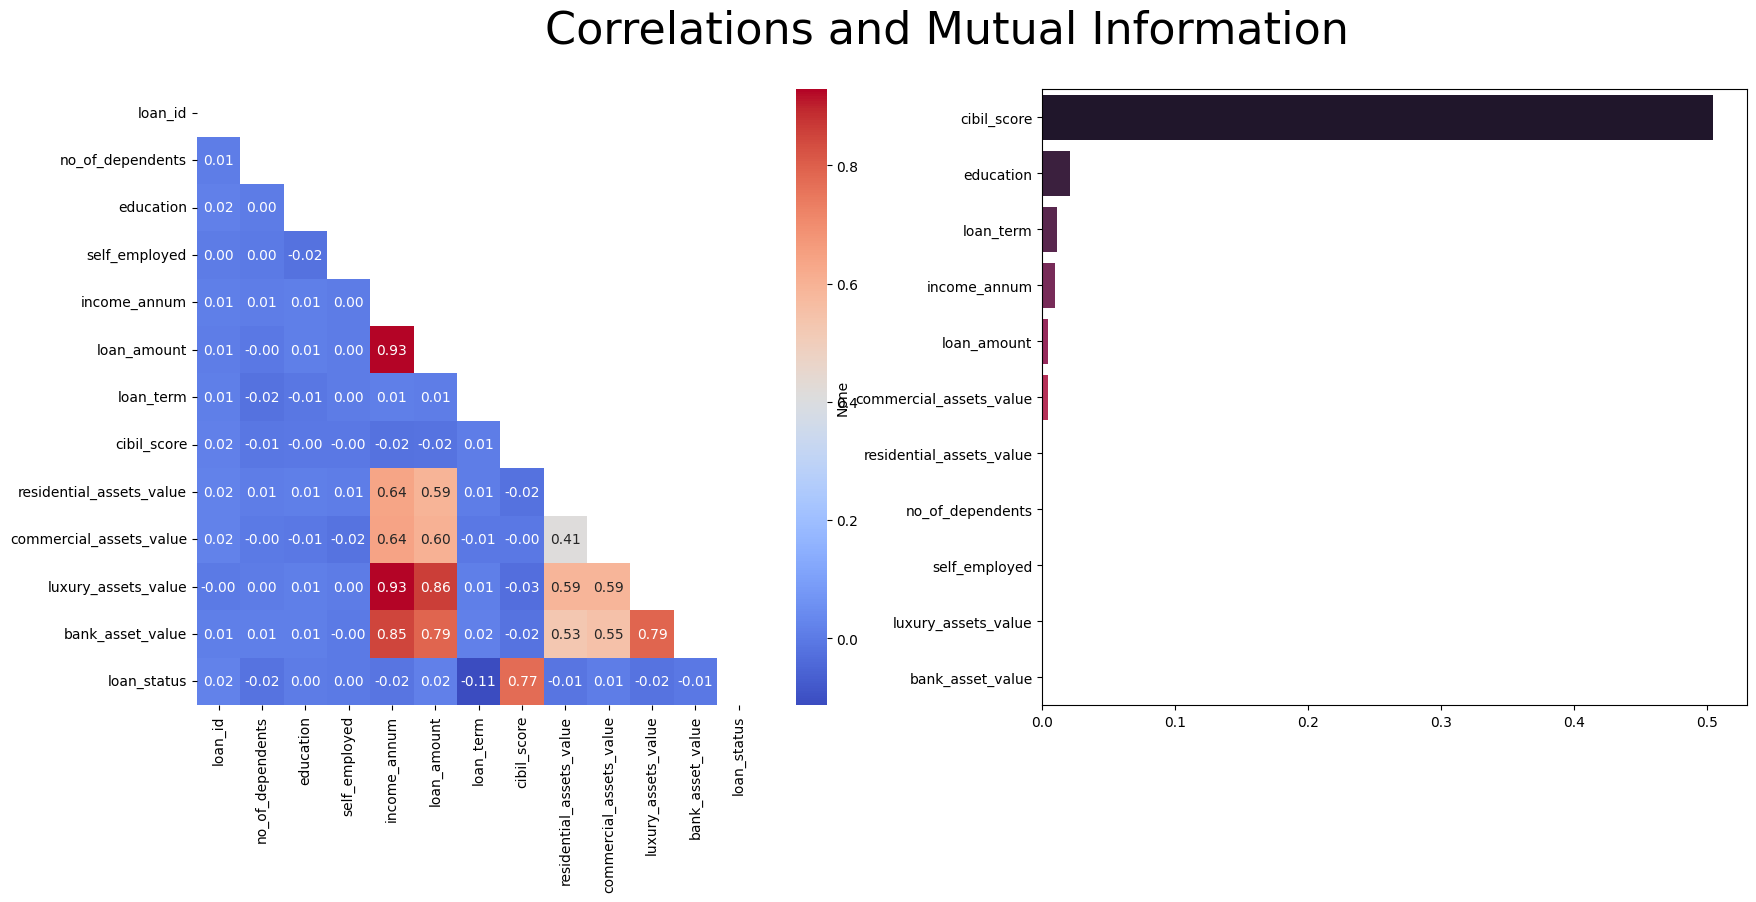

In [55]:
#collerations mutuel information
fig , axes = plt.subplots(1,2,figsize=(20,8))
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(data=df_corr,annot=True,cmap='coolwarm',mask=mask, ax=axes[0],fmt='.2f')
# Mututal information
mi_scores = mutual_info_classif(X, df.loan_status)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
sns.barplot(x = mi_scores.values, y =mi_scores.index, ax = axes[1], palette = 'rocket')
fig.suptitle('Correlations and Mutual Information', fontsize = 32)

Traint Test Split

In [56]:
# train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
#preprocessing
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore")),
    ]
)
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)


cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(include="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [59]:
#the feature transformation process
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Training model

In [61]:
#model training
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {}
models['XGB'] = XGBClassifier(random_state = 0)
models['RF'] = RandomForestClassifier(random_state=0)
models['LR'] = LogisticRegression(random_state=0)
models['LGBM'] = LGBMClassifier(random_state=0)
models['SGDC'] = SGDClassifier(random_state=0)
models['ADA'] = AdaBoostClassifier(random_state=0)
models['SVC'] = SVC(random_state=0)
models['GBC'] = GradientBoostingClassifier(random_state=0)
models['KNN'] = KNeighborsClassifier()
model_score = {}
y_preds = {}

for model_name in models.keys():
    models[model_name].fit(X_train,y_train)
    y_preds[model_name] = models[model_name].predict(X_test)
    model_score[model_name] = accuracy_score(y_test, y_preds[model_name])
    print(f"Accuracy score of {model_name} is {model_score[model_name]}")

model_score = dict(sorted(model_score.items(), key=lambda x: x[1], reverse=True))
model_score

Accuracy score of XGB is 0.9824355971896955
Accuracy score of RF is 0.9789227166276346
Accuracy score of LR is 0.905152224824356


c:\Users\VegaNtech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2120, number of negative: 1295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620791 -> initscore=0.492905
[LightGBM] [Info] Start training from score 0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

c:\Users\VegaNtech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy score of LGBM is 0.9847775175644028
Accuracy score of SGDC is 0.8957845433255269
Accuracy score of ADA is 0.9695550351288056
Accuracy score of SVC is 0.9238875878220141
Accuracy score of GBC is 0.977751756440281
Accuracy score of KNN is 0.892271662763466


{'LGBM': 0.9847775175644028,
 'XGB': 0.9824355971896955,
 'RF': 0.9789227166276346,
 'GBC': 0.977751756440281,
 'ADA': 0.9695550351288056,
 'SVC': 0.9238875878220141,
 'LR': 0.905152224824356,
 'SGDC': 0.8957845433255269,
 'KNN': 0.892271662763466}

Model Evaluation

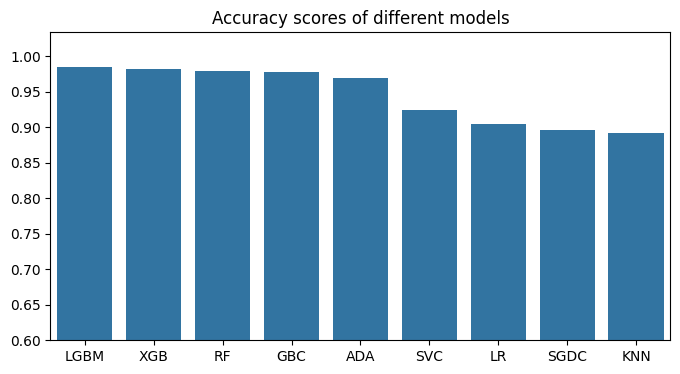

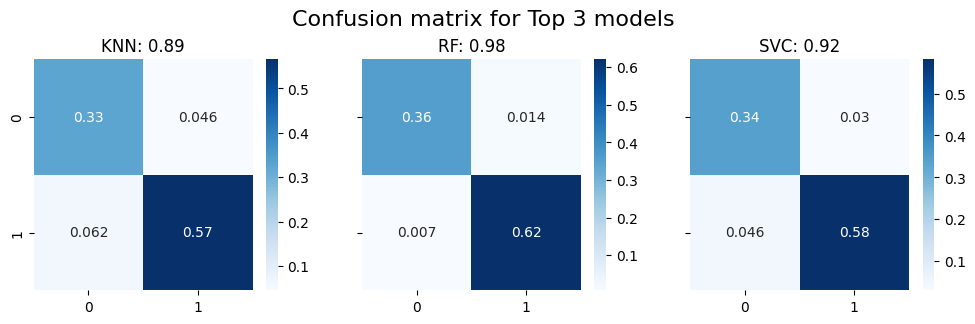

[]

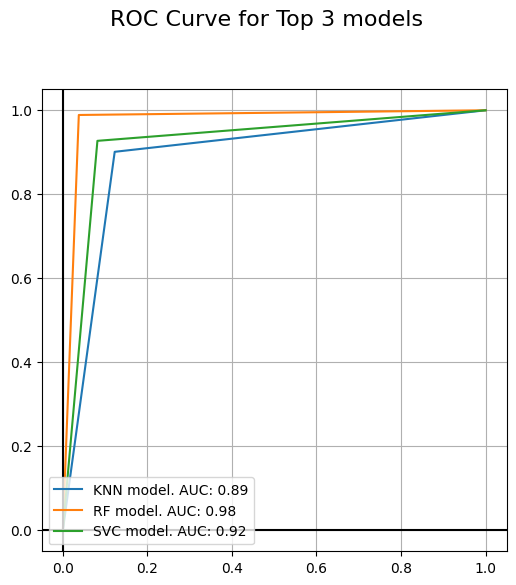

In [62]:
#Model evaluation
fig, axes = plt.subplots(figsize=(8,4))
sns.barplot(y = list(model_score.values()), x= list(model_score.keys()), ax = axes)
axes.set_ylim(0.6,)
axes.set_title("Accuracy scores of different models")
fig, ax = plt.subplots(1,3, figsize=(12,3), sharey=True)

mtx = confusion_matrix(y_test,y_preds['KNN'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[0])
ax[0].set_title("KNN: %.2f"%(model_score['KNN']))

mtx = confusion_matrix(y_test,y_preds['RF'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[1])
ax[1].set_title("RF: %.2f"%(model_score['RF']))


mtx = confusion_matrix(y_test,y_preds['SVC'], normalize='all')
sns.heatmap(mtx, annot=True, cmap='Blues', ax = ax[2])
ax[2].set_title("SVC: %.2f"%(model_score['SVC']))

fig.suptitle('Confusion matrix for Top 3 models', fontsize = 16, va='bottom')
plt.show()
#ROC CURVE
fig, ax = plt.subplots(figsize=(6,6))

for model_name in ['KNN', 'RF', 'SVC']: 
    fpr, tpr, threshold = roc_curve(y_test,y_preds[model_name])
    auc_area = auc(fpr, tpr)
    ax.plot(fpr, tpr, label= f'{model_name} model. AUC: {round(auc_area,2)}')

ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
fig.suptitle('ROC Curve for Top 3 models', fontsize = 16, va='bottom')
plt.legend(loc = 3)
plt.plot()

PREDICTION